<div style="background-color: #e6f7ff; padding: 10px; border-radius: 5px;">
<h1 style="color: #333;">IBM EMPLOYEE ATTRITION PROJECT</h1>
<p>This project analyzes the effects of factors such as demographic characteristics and job satisfaction levels of employees on turnover in order to understand the reasons for turnover and develop strategies.</p>
</div>

![Görsel Açıklaması](https://imgur.com/keLD0jG.png)


<div style="background-color: #e6f7ff; padding: 10px; border-radius: 5px;">
    <h2>Required Libraries</h2>
</div>

In [118]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV, train_test_split, cross_validate, cross_val_score)
from sklearn.metrics import (accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, 
                             confusion_matrix, classification_report, make_scorer, mean_squared_error, 
                             mean_absolute_error, r2_score, roc_curve, auc, ConfusionMatrixDisplay)
from sklearn.preprocessing import (StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler)
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor)
from sklearn.linear_model import (LogisticRegression, Ridge, Lasso, ElasticNet, LinearRegression)
from sklearn.tree import (DecisionTreeClassifier, DecisionTreeRegressor)
from sklearn.neighbors import (KNeighborsClassifier, LocalOutlierFactor)
from sklearn.svm import SVR
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, chi2
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from xgboost import XGBClassifier, XGBRegressor
from skopt import BayesSearchCV
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from tabulate import tabulate
import warnings

# Warnings turned off
warnings.simplefilter("ignore")
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

<div style="background-color: #e6f7ff; padding: 10px; border-radius: 5px;">
    <h2>Data Collection</h2>
</div>

In [119]:
# Upload the data
df = pd.read_csv("/kaggle/input/ibm-hr-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


<div style="background-color: #e6f7ff; padding: 10px; border-radius: 5px;">
    <h2>Exploratory Data Analysis (EDA)</h2>
</div>

  ###  Understand and Summarize Data

In [120]:
def check_df(dataframe, head=5):
    # Shape
    shape_table = [["Shape", dataframe.shape]]

    # Types
    types_table = dataframe.dtypes.reset_index()
    types_table.columns = ['Column', 'Type']

    # NA
    na_table = dataframe.isnull().sum().reset_index()
    na_table.columns = ['Column', 'NA Count']

    # Quantiles
    #quantiles_table = dataframe.describe([0.01, 0.05, 0.50, 0.95, 0.99]).T.reset_index()
    #quantiles_table.columns = ['Column', 'Count', 'Mean', 'Std', 'Min', '1%', '5%', '50%', '95%', '99%', 'Max']

    # Print tables
    print("\n##################### Shape #####################\n")
    print(tabulate(shape_table, headers=['Metric', 'Value'], tablefmt='psql'))
    print("\n##################### Types #####################\n")
    print(tabulate(types_table, headers='keys', tablefmt='psql', showindex=False))
    print("\n##################### NA #####################\n")
    print(tabulate(na_table, headers='keys', tablefmt='psql', showindex=False))
    #print("\n##################### Quantiles #####################\n")
    #print(tabulate(quantiles_table, headers='keys', tablefmt='psql', showindex=False))

check_df(df)


##################### Shape #####################

+----------+------------+
| Metric   | Value      |
|----------+------------|
| Shape    | (1470, 35) |
+----------+------------+

##################### Types #####################

+--------------------------+--------+
| Column                   | Type   |
|--------------------------+--------|
| Age                      | int64  |
| Attrition                | object |
| BusinessTravel           | object |
| DailyRate                | int64  |
| Department               | object |
| DistanceFromHome         | int64  |
| Education                | int64  |
| EducationField           | object |
| EmployeeCount            | int64  |
| EmployeeNumber           | int64  |
| EnvironmentSatisfaction  | int64  |
| Gender                   | object |
| HourlyRate               | int64  |
| JobInvolvement           | int64  |
| JobLevel                 | int64  |
| JobRole                  | object |
| JobSatisfaction          | int64  |
| Mari

In [121]:
# To see the constant columns
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
print("Constant Columns:", constant_columns)

Constant Columns: ['EmployeeCount', 'Over18', 'StandardHours']


In [122]:
# Drop the constant columns and cardinal column 
df.drop(['EmployeeCount','Over18', 'StandardHours' ], axis=1, inplace=True)
df.drop(['EmployeeNumber'], axis=1, inplace=True)

In [123]:
# Treshold values for categorical, numeric and cardinal variables were determined and all were displayed

def grab_col_names(dataframe, cat_th=15, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car
cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 1470
Variables: 31
cat_cols: 19
num_cols: 12
cat_but_car: 0
num_but_cat: 11


### Visualize the Data

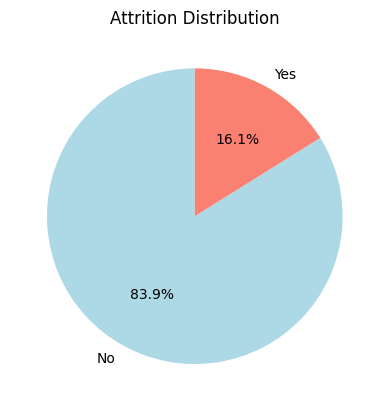

In [124]:
df['Attrition'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon'], startangle=90)
plt.title('Attrition Distribution')
plt.ylabel('')  
plt.show()

,Attrition,Ratio
Attrition,,
No,1233,83.877551
Yes,237,16.122449


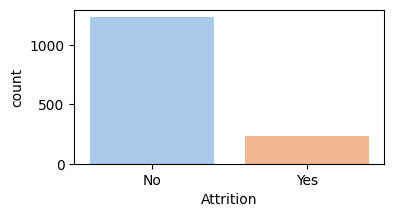

,BusinessTravel,Ratio
BusinessTravel,,
Travel_Rarely,1043,70.952381
Travel_Frequently,277,18.843537
Non-Travel,150,10.204082


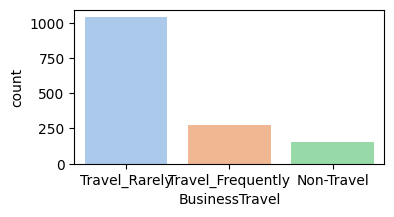

,Department,Ratio
Department,,
Research & Development,961,65.374150
Sales,446,30.340136
Human Resources,63,4.285714


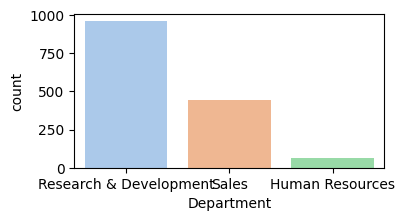

,EducationField,Ratio
EducationField,,
Life Sciences,606,41.224490
Medical,464,31.564626
Marketing,159,10.816327
Technical Degree,132,8.979592
Other,82,5.578231
Human Resources,27,1.836735


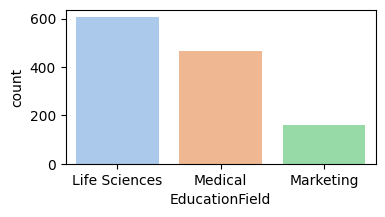

,Gender,Ratio
Gender,,
Male,882,60.0
Female,588,40.0


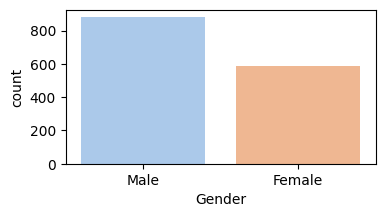

,JobRole,Ratio
JobRole,,
Sales Executive,326,22.176871
Research Scientist,292,19.863946
Laboratory Technician,259,17.619048
Manufacturing Director,145,9.863946
Healthcare Representative,131,8.911565
Manager,102,6.938776
Sales Representative,83,5.646259
Research Director,80,5.442177
Human Resources,52,3.537415


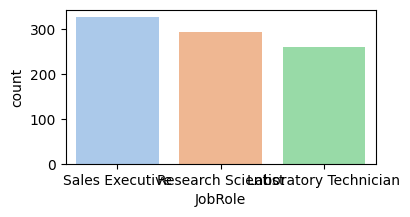

,MaritalStatus,Ratio
MaritalStatus,,
Married,673,45.782313
Single,470,31.972789
Divorced,327,22.244898


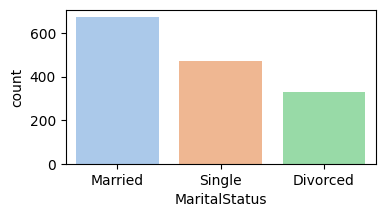

,OverTime,Ratio
OverTime,,
No,1054,71.70068
Yes,416,28.29932


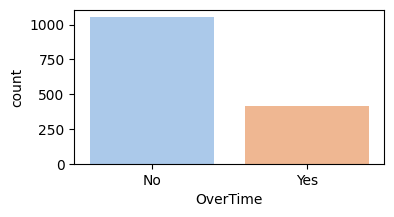

,Education,Ratio
Education,,
3,572,38.911565
4,398,27.074830
2,282,19.183673
1,170,11.564626
5,48,3.265306


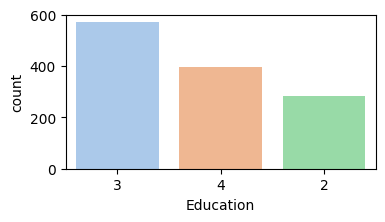

,EnvironmentSatisfaction,Ratio
EnvironmentSatisfaction,,
3,453,30.816327
4,446,30.340136
2,287,19.523810
1,284,19.319728


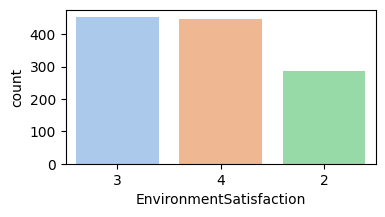

,JobInvolvement,Ratio
JobInvolvement,,
3,868,59.047619
2,375,25.510204
4,144,9.795918
1,83,5.646259


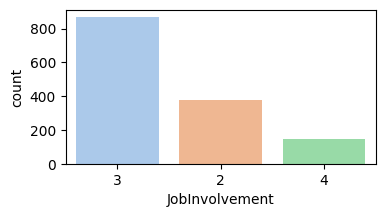

,JobLevel,Ratio
JobLevel,,
1,543,36.938776
2,534,36.326531
3,218,14.829932
4,106,7.210884
5,69,4.693878


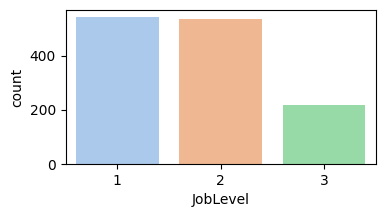

,JobSatisfaction,Ratio
JobSatisfaction,,
4,459,31.224490
3,442,30.068027
1,289,19.659864
2,280,19.047619


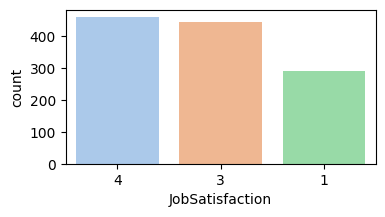

,NumCompaniesWorked,Ratio
NumCompaniesWorked,,
1,521,35.442177
0,197,13.401361
3,159,10.816327
2,146,9.931973
4,139,9.455782
7,74,5.034014
6,70,4.761905
5,63,4.285714
9,52,3.537415


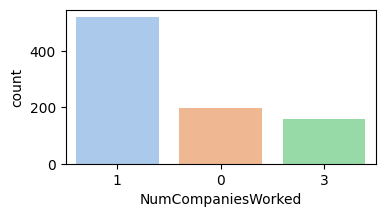

,PerformanceRating,Ratio
PerformanceRating,,
3,1244,84.62585
4,226,15.37415


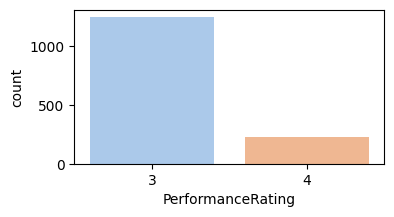

,RelationshipSatisfaction,Ratio
RelationshipSatisfaction,,
3,459,31.224490
4,432,29.387755
2,303,20.612245
1,276,18.775510


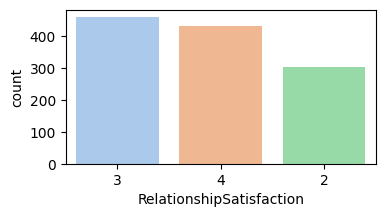

,StockOptionLevel,Ratio
StockOptionLevel,,
0,631,42.925170
1,596,40.544218
2,158,10.748299
3,85,5.782313


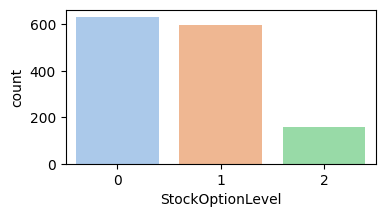

,TrainingTimesLastYear,Ratio
TrainingTimesLastYear,,
2,547,37.210884
3,491,33.401361
4,123,8.367347
5,119,8.095238
1,71,4.829932
6,65,4.421769
0,54,3.673469


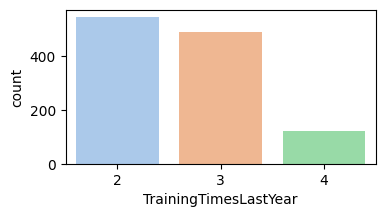

,WorkLifeBalance,Ratio
WorkLifeBalance,,
3,893,60.748299
2,344,23.401361
4,153,10.408163
1,80,5.442177


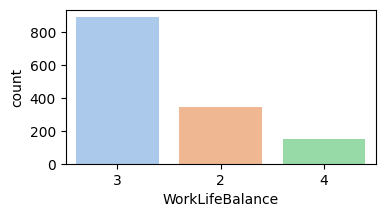

In [125]:
for col in cat_cols:
    display(pd.DataFrame({col: df[col].value_counts(),
                          "Ratio": 100 * df[col].value_counts() / len(df)}))
    plt.figure(figsize=(4, 2))
    sns.countplot(x=col, data=df, palette='pastel', order=df[col].value_counts().head(3).index)
    plt.show()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
5%         24.000000
10%        26.000000
20%        29.000000
30%        31.000000
40%        34.000000
50%        36.000000
60%        38.000000
70%        41.000000
80%        45.000000
90%        50.000000
95%        54.000000
99%        58.310000
max        60.000000
Name: Age, dtype: float64
#####################################
count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
5%        165.350000
10%       242.800000
20%       391.800000
30%       530.700000
40%       656.200000
50%       802.000000
60%       942.400000
70%      1094.600000
80%      1224.200000
90%      1356.000000
95%      1424.100000
99%      1485.000000
max      1499.000000
Name: DailyRate, dtype: float64
#####################################
count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
5%          1.000000
10%         1.000000
20%         2.000000
30%  

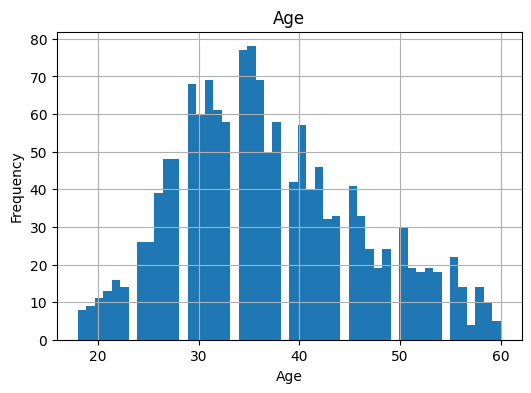

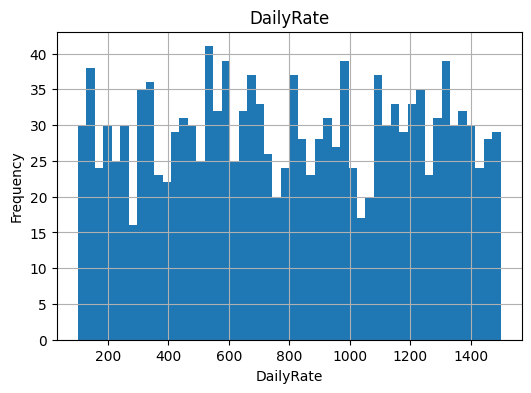

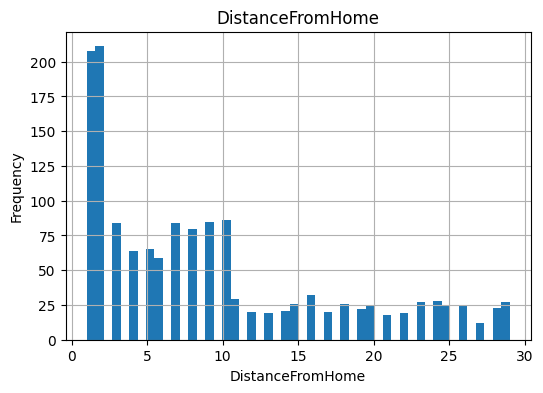

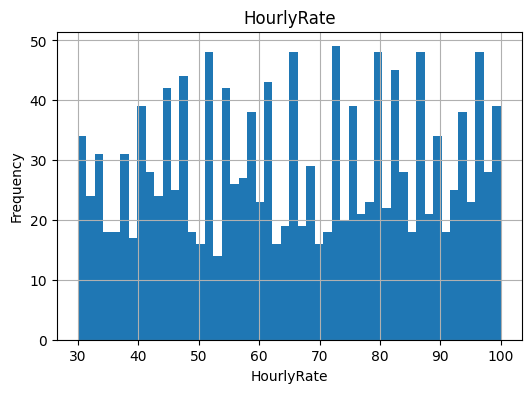

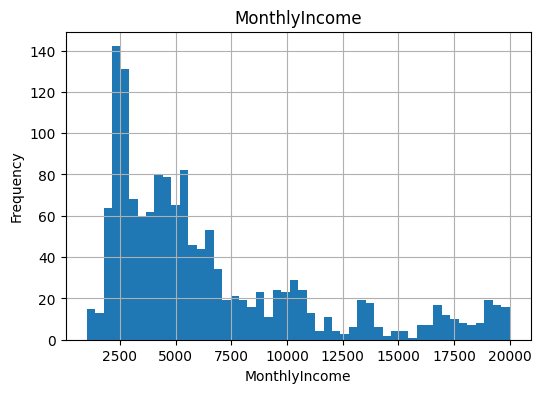

In [126]:
def num_summary(dataframe, numerical_col, plot=False):
    if numerical_col == "Id":
        return
    
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        plt.figure(figsize=(6, 4))  # Grafik boyutunu belirle
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.ylabel('Frequency')
        plt.title(numerical_col)
        #plt.show()

    print("#####################################")
    
for col in num_cols[:5]:
    num_summary(df, col, True)

### Multivariate Analysis

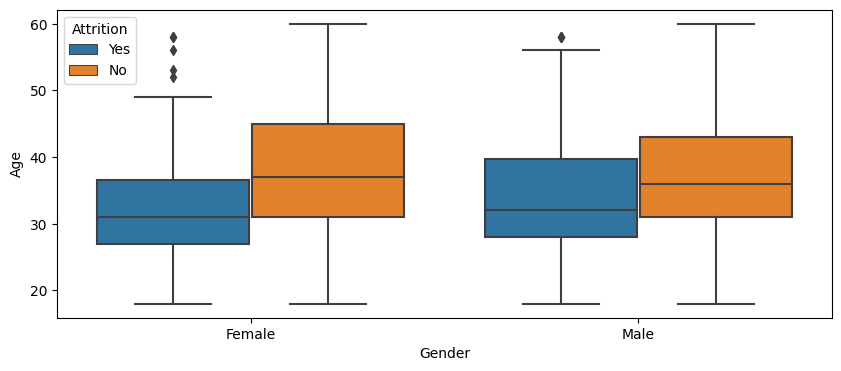

In [127]:
plt.figure(figsize=(10,4))
sns.boxplot(x="Gender", y="Age", data=df, hue='Attrition')
plt.show()

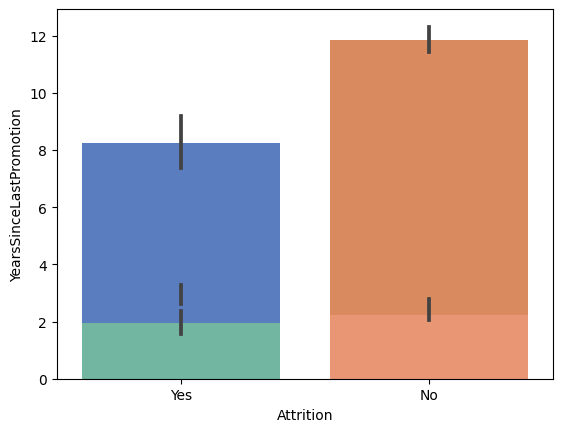

In [128]:
sns.barplot(x='Attrition', y='NumCompaniesWorked', data=df)
sns.barplot(x='Attrition', y='TotalWorkingYears', data=df, palette="muted")
sns.barplot(x='Attrition', y='YearsSinceLastPromotion', data=df, palette="Set2")
plt.show()

### Generate Basic Statistic - Correlation Heatmap

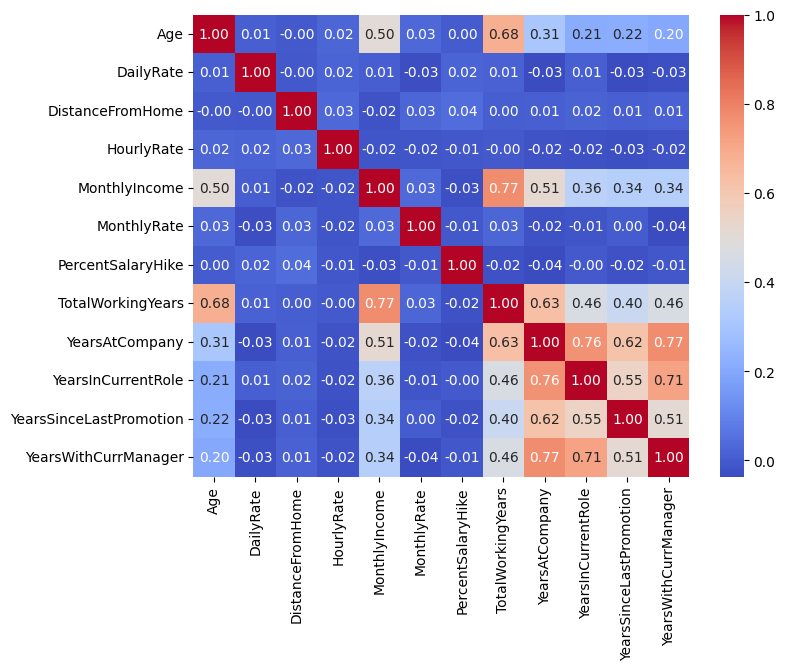

In [129]:
df_numeric = df[num_cols]
corr = df_numeric.corr()

# Korelasyon heatmap'i:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

MonthlyIncome            TotalWorkingYears          0.772893
YearsAtCompany           YearsWithCurrManager       0.769212
                         YearsInCurrentRole         0.758754
YearsInCurrentRole       YearsWithCurrManager       0.714365
Age                      TotalWorkingYears          0.680381
TotalWorkingYears        YearsAtCompany             0.628133
YearsAtCompany           YearsSinceLastPromotion    0.618409
YearsInCurrentRole       YearsSinceLastPromotion    0.548056
MonthlyIncome            YearsAtCompany             0.514285
YearsSinceLastPromotion  YearsWithCurrManager       0.510224
Age                      MonthlyIncome              0.497855
TotalWorkingYears        YearsInCurrentRole         0.460365
                         YearsWithCurrManager       0.459188
                         YearsSinceLastPromotion    0.404858
MonthlyIncome            YearsInCurrentRole         0.363818
dtype: float64


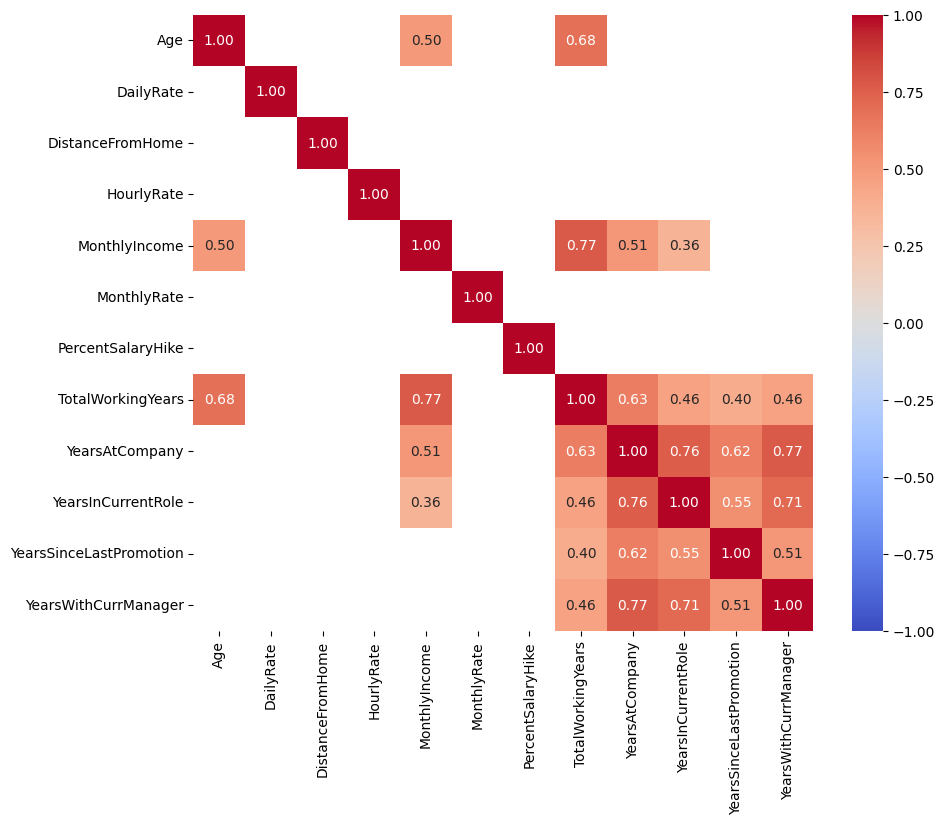

In [130]:
# Highly correlated variables in the correlation metric are ranked.

corr_matrix = df_numeric.corr()

corr_unstacked = corr_matrix.unstack()

corr_unstacked = corr_unstacked[corr_unstacked != 1].drop_duplicates()

sorted_corr = corr_unstacked.sort_values(ascending=False)

corr_unstacked_filtered = sorted_corr[(sorted_corr > 0.35) | (sorted_corr < -0.35)]

print(corr_unstacked_filtered)

filtered_corr_matrix = corr_matrix[(corr_matrix > 0.35) | (corr_matrix < -0.35)]

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [131]:
# Code Attrition variable as 0 and 1
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [132]:
# Income Groups
bins = [1000, 5000, 10000, 15000, 20000]  
labels = ['Low', 'Medium', 'High', 'Very High'] 

df['IncomeCategory'] = pd.cut(df['MonthlyIncome'], bins=bins, labels=labels, right=True)

In [133]:
# Age Groups
bins = [18, 25, 35, 45, 60]  # Sınırlar
labels = ['Young', 'Young Adult', 'Middle-Aged Adult', 'Older Adult'] 

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

In [134]:
# Distance Groups
bins = [0, 5, 15, 29]  # Sınırlar
labels = ['Very Close', 'Moderate Distance', 'Far']

df['DistanceGroup'] = pd.cut(df['DistanceFromHome'], bins=bins, labels=labels, right=True)

In [135]:
df['IncomeCategory'] = df['IncomeCategory'].astype('object')
df['AgeGroup'] = df['AgeGroup'].astype('object')
df['DistanceGroup'] = df['DistanceGroup'].astype('object')
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype('object')
df['TrainingTimesLastYear'] = df['TrainingTimesLastYear'].astype('object')

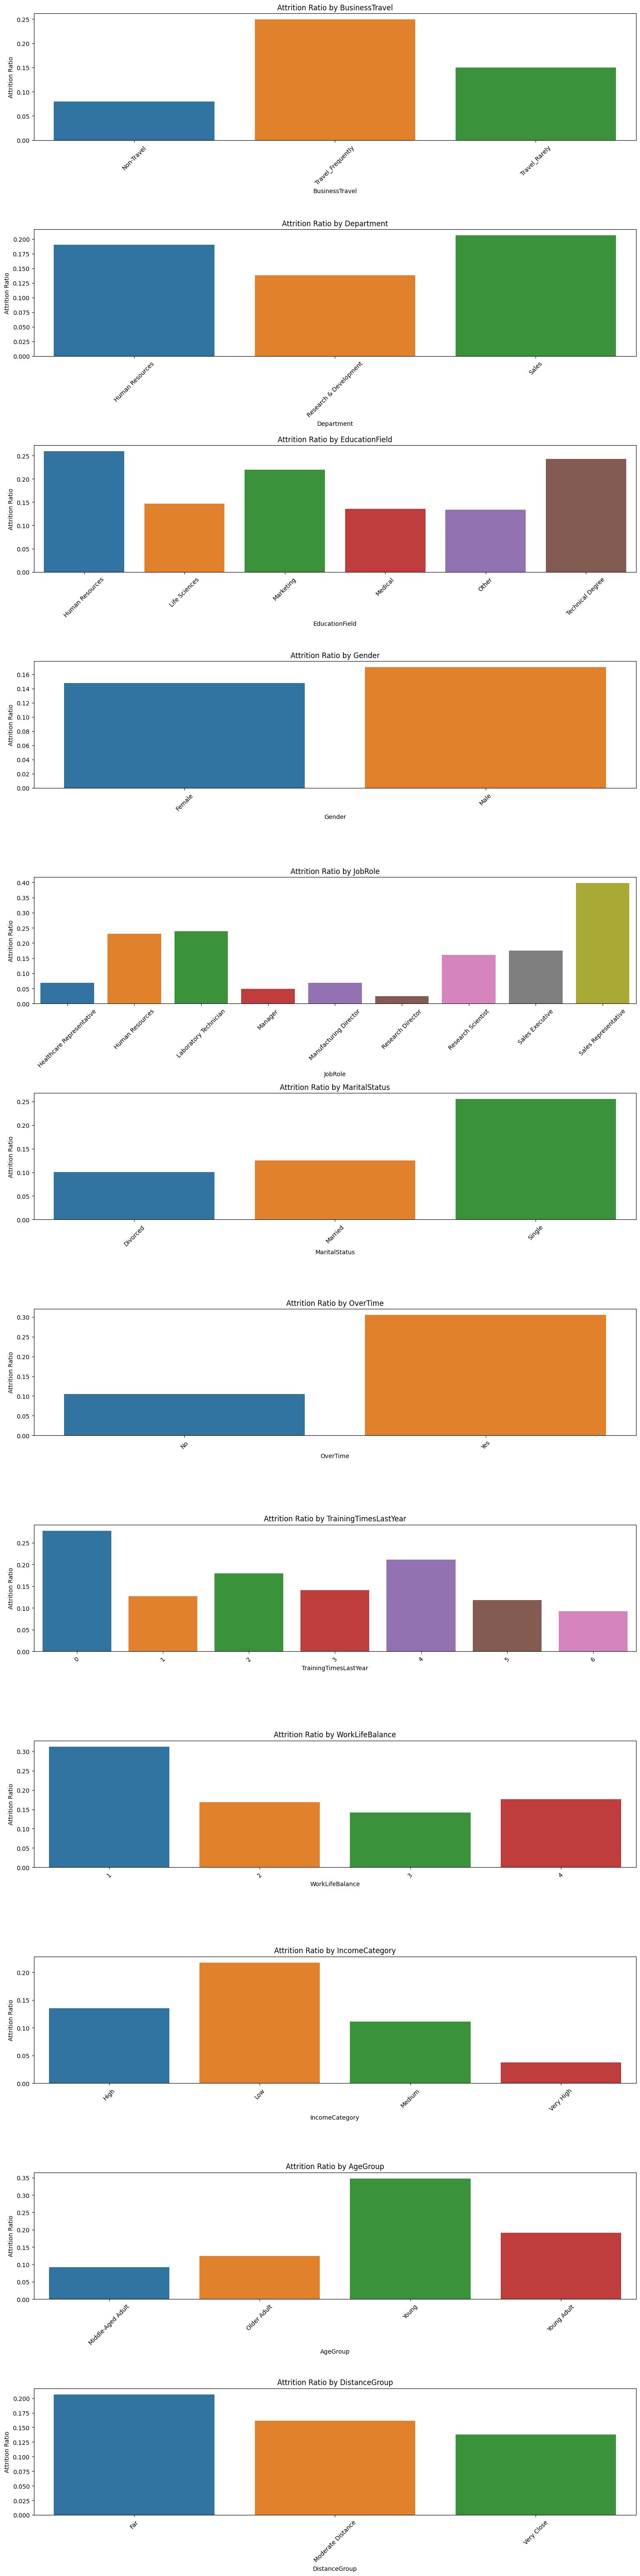

In [136]:
# Identify columns with the object data type
object_cols = df.select_dtypes(include=['object']).columns

# Calculate attrition rates for each object-type column
attrition_ratios = {}

for col in object_cols:
    attrition_ratio = df.groupby(col)['Attrition'].mean()  # Calculates the mean for Attrition=1
    attrition_ratios[col] = attrition_ratio

# Visualization
plt.figure(figsize=(15, len(object_cols) * 5))  # Adjust the figure size dynamically

for i, (col, ratios) in enumerate(attrition_ratios.items()):
    plt.subplot(len(object_cols), 1, i + 1)  
    sns.barplot(x=ratios.index, y=ratios.values)
    plt.title(f'Attrition Ratio by {col}')
    plt.ylabel('Attrition Ratio')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [156]:
# Create a dictionary to store the dataframes for each column
attrition_tables = {}

for col in object_cols:
    attrition_ratio = df.groupby(col)['Attrition'].mean()  
    attrition_percentage = attrition_ratio * 100 
    attrition_table = attrition_percentage.reset_index() 
    attrition_table.columns = [col, 'Attrition (%)']  
    attrition_tables[col] = attrition_table  

for col, table in attrition_tables.items():
    print(f"\nAttrition Percentage for {col}:\n")
    display(table)


Attrition Percentage for BusinessTravel:



,BusinessTravel,Attrition (%)
0,Non-Travel,8.000000
1,Travel_Frequently,24.909747
2,Travel_Rarely,14.956855



Attrition Percentage for Department:



,Department,Attrition (%)
0,Human Resources,19.047619
1,Research & Development,13.839750
2,Sales,20.627803



Attrition Percentage for EducationField:



,EducationField,Attrition (%)
0,Human Resources,25.925926
1,Life Sciences,14.686469
2,Marketing,22.012579
3,Medical,13.577586
4,Other,13.414634
5,Technical Degree,24.242424



Attrition Percentage for Gender:



,Gender,Attrition (%)
0,Female,14.795918
1,Male,17.006803



Attrition Percentage for JobRole:



,JobRole,Attrition (%)
0,Healthcare Representative,6.870229
1,Human Resources,23.076923
2,Laboratory Technician,23.938224
3,Manager,4.901961
4,Manufacturing Director,6.896552
5,Research Director,2.500000
6,Research Scientist,16.095890
7,Sales Executive,17.484663
8,Sales Representative,39.759036



Attrition Percentage for MaritalStatus:



,MaritalStatus,Attrition (%)
0,Divorced,10.091743
1,Married,12.481426
2,Single,25.531915



Attrition Percentage for OverTime:



,OverTime,Attrition (%)
0,No,10.436433
1,Yes,30.528846



Attrition Percentage for TrainingTimesLastYear:



,TrainingTimesLastYear,Attrition (%)
0,0,27.777778
1,1,12.676056
2,2,17.915905
3,3,14.052953
4,4,21.138211
5,5,11.764706
6,6,9.230769



Attrition Percentage for WorkLifeBalance:



,WorkLifeBalance,Attrition (%)
0,1,31.250000
1,2,16.860465
2,3,14.221725
3,4,17.647059



Attrition Percentage for IncomeCategory:



,IncomeCategory,Attrition (%)
0,High,13.513514
1,Low,21.762350
2,Medium,11.136364
3,Very High,3.759398



Attrition Percentage for AgeGroup:



,AgeGroup,Attrition (%)
0,Middle-Aged Adult,9.188034
1,Older Adult,12.454212
2,Young,34.782609
3,Young Adult,19.141914



Attrition Percentage for DistanceGroup:



,DistanceGroup,Attrition (%)
0,Far,20.668693
1,Moderate Distance,16.110020
2,Very Close,13.765823


## Data Preprocessing

In [137]:
# Outliers in the numerical columns of the dataframe were checked,
# and each column was examined for the presence of outliers.

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    if dataframe[col_name].dtype != 'object': 
        low_limit, up_limit = outlier_thresholds(dataframe, col_name)
        if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
            return True
    return False

for col in num_cols:
    print(col, check_outlier(df, col))

Age False
DailyRate False
DistanceFromHome False
HourlyRate False
MonthlyIncome False
MonthlyRate False
PercentSalaryHike False
TotalWorkingYears False
YearsAtCompany False
YearsInCurrentRole False
YearsSinceLastPromotion False
YearsWithCurrManager False


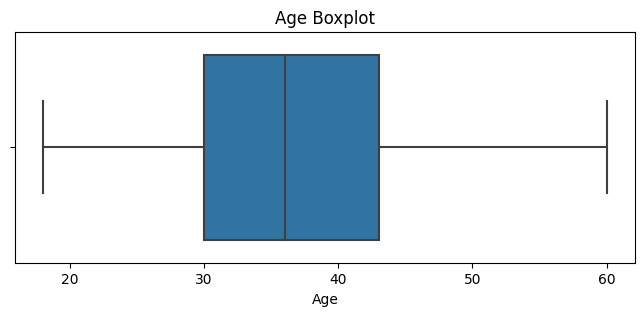

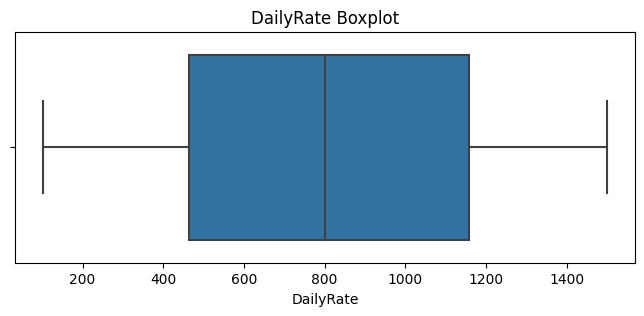

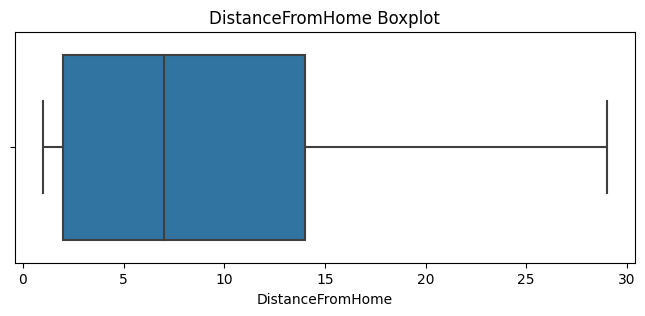

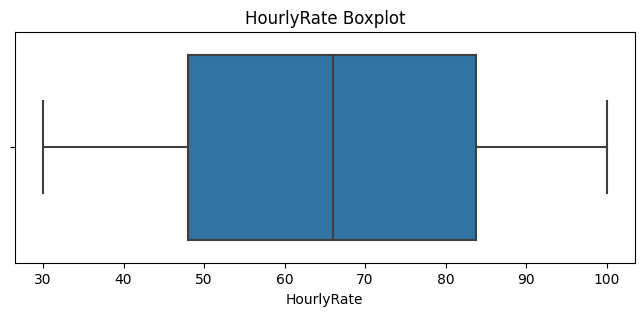

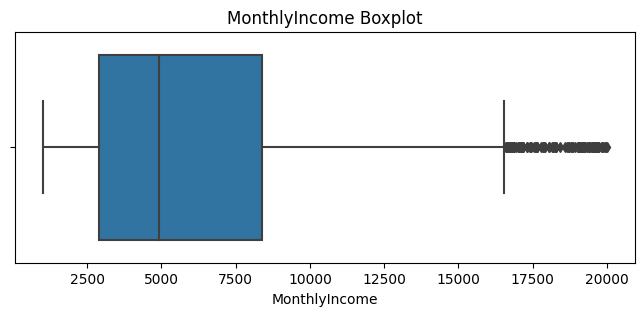

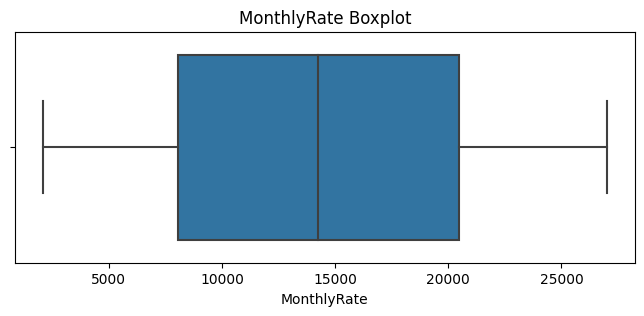

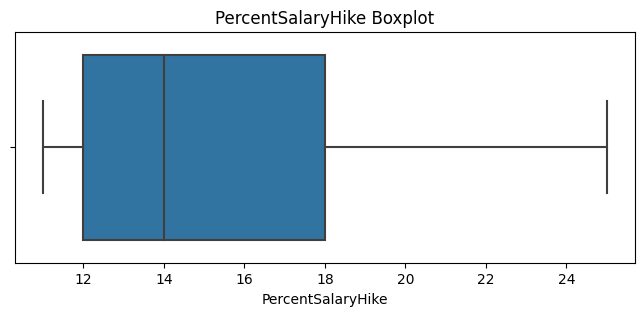

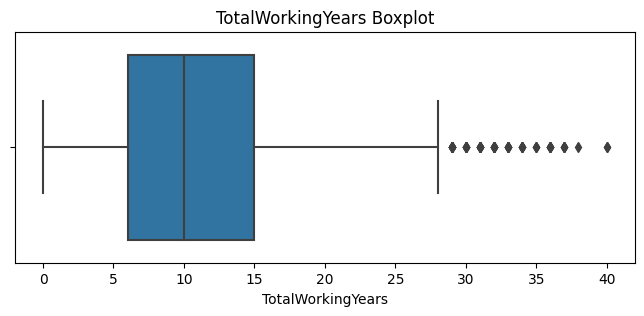

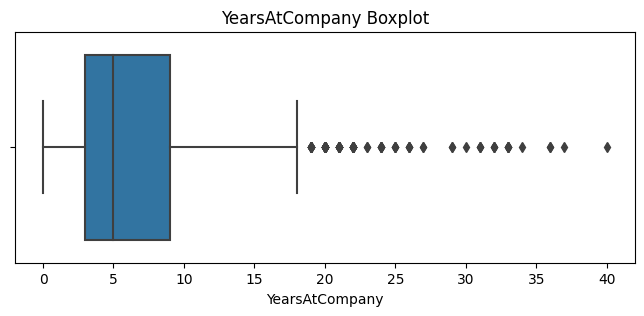

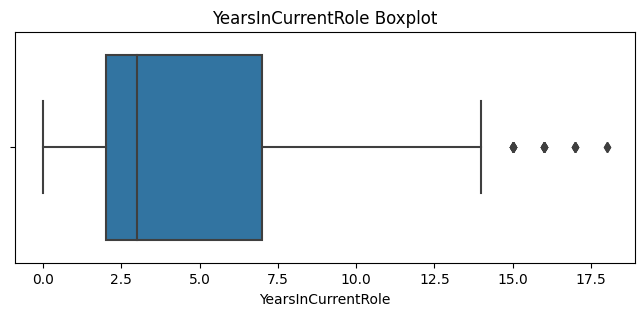

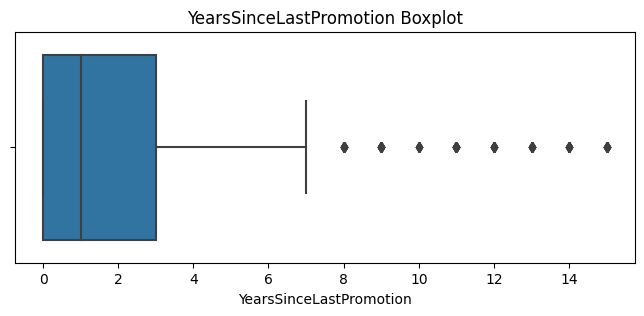

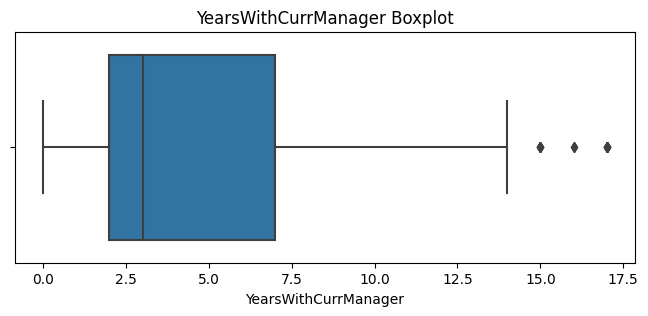

In [138]:
# Visualize Outliers:

#for col in num_cols: 
    #plt.figure(figsize=(8, 3))
    #sns.boxplot(x=df[col])
    #plt.xticks(rotation=0)
    #plt.title(col + ' Boxplot')  
    #plt.show()

## Feature Engineering

****New Variables Created****

In [139]:
df['Experience_JobLevel'] = df['YearsAtCompany'] * df['JobLevel']
df['ManagerInvolvement'] = df['YearsWithCurrManager'] * df['JobInvolvement']
df['IncomePerLevel'] = df['MonthlyIncome'] / df['JobLevel']
df['IncomeToHikeRatio'] = df['MonthlyIncome'] / df['PercentSalaryHike']
df['RoleChangeGap'] = df['YearsAtCompany'] - df['YearsInCurrentRole']
df['WorkLifeSatisfaction'] = (df['WorkLifeBalance'] + df['JobSatisfaction']) / 2

****Encoding****

In [140]:
# Convert categorical variables to dummy variables (one hot encoder)
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_dummies = pd.get_dummies(df[cat_cols], drop_first=True)

# Combine numeric variables and dummy variables
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
X_all = pd.concat([df[num_cols].drop('Attrition', axis=1), cat_dummies], axis=1)
X_all.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Experience_JobLevel,ManagerInvolvement,IncomePerLevel,IncomeToHikeRatio,RoleChangeGap,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,IncomeCategory_Low,IncomeCategory_Medium,IncomeCategory_Very High,AgeGroup_Older Adult,AgeGroup_Young,AgeGroup_Young Adult,DistanceGroup_Moderate Distance,DistanceGroup_Very Close,WorkLifeSatisfaction_1.5,WorkLifeSatisfaction_2.0,WorkLifeSatisfaction_2.5,WorkLifeSatisfaction_3.0,WorkLifeSatisfaction_3.5,WorkLifeSatisfaction_4.0
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,6,4,0,5,12,15,2996.5,544.818182,2,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,10,7,1,7,20,14,2565.0,223.043478,3,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,0,0,0,0,0,0,2090.0,139.333333,0,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,8,7,3,0,8,0,2909.0,264.454545,1,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,2,2,2,2,2,6,3468.0,289.000000,0,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False


In [141]:
# Select the most important 30 variables with SelectKBest
selector = SelectKBest(chi2, k=30)
X_selected = selector.fit_transform(X_all, df['Attrition'])

# Get the column names selected by SelectKBest
selected_features = X_all.columns[selector.get_support()]
selected_features

Index(['Age', 'DailyRate', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Experience_JobLevel', 'ManagerInvolvement', 'IncomePerLevel', 'IncomeToHikeRatio', 'RoleChangeGap', 'BusinessTravel_Travel_Frequently', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Sales Representative', 'MaritalStatus_Single', 'OverTime_Yes', 'IncomeCategory_Low', 'IncomeCategory_Medium', 'IncomeCategory_Very High', 'AgeGroup_Young', 'WorkLifeSatisfaction_3.5'],
      dtype='object')

## Modeling

In [142]:
# Split Data into Test and Train
X_train, X_test, y_train, y_test = train_test_split(X_selected, df['Attrition'], test_size=0.20, random_state=1)

# Random Oversampling Applied
train_data = pd.concat([pd.DataFrame(X_train), y_train.reset_index(drop=True)], axis=1)
df_majority = train_data[train_data.iloc[:, -1] == 0]
df_minority = train_data[train_data.iloc[:, -1] == 1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,  # Örnekleri tekrarla
                                 n_samples=len(df_majority),  # Çoğunluk sınıfına eşit yap
                                 random_state=42)

train_data_balanced = pd.concat([df_majority, df_minority_upsampled])

# Reallocate the balanced training data
X_train_balanced = train_data_balanced.iloc[:, :-1]
y_train_balanced = train_data_balanced.iloc[:, -1]

# Apply MinMaxScaler to the training set and do the same transformation to the test set
scaler = MinMaxScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

## Model Evaluation

In [143]:
# Model training and performance evaluation
models = [('Logistic Regression', LogisticRegression(max_iter=1000)),
          ('CART', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()),
          ('LightGBM', LGBMClassifier(verbose=-1)),
          ('CatBoost', CatBoostClassifier(verbose=False)),
          ('XGBoost', XGBClassifier())]

performances = {}

for name, classifier in models:
    # Train the model
    classifier.fit(X_train_balanced_scaled, y_train_balanced)

    # Get prediction values
    y_pred = classifier.predict(X_test_scaled)

    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Save performance
    performances[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'ROC AUC': roc_auc}

for name, performance in performances.items():
    print(f"{name}:")
    for metric_name, value in performance.items():
        print(f"  {metric_name}: {round(value, 4)}")
    print()

Logistic Regression:
  Accuracy: 0.7313
  Precision: 0.4037
  Recall: 0.7586
  F1: 0.5269
  ROC AUC: 0.7416

CART:
  Accuracy: 0.7891
  Precision: 0.4524
  Recall: 0.3276
  F1: 0.38
  ROC AUC: 0.6151

Random Forest:
  Accuracy: 0.8299
  Precision: 0.6818
  Recall: 0.2586
  F1: 0.375
  ROC AUC: 0.6145

LightGBM:
  Accuracy: 0.8469
  Precision: 0.6585
  Recall: 0.4655
  F1: 0.5455
  ROC AUC: 0.7031

CatBoost:
  Accuracy: 0.8367
  Precision: 0.619
  Recall: 0.4483
  F1: 0.52
  ROC AUC: 0.6902

XGBoost:
  Accuracy: 0.8367
  Precision: 0.619
  Recall: 0.4483
  F1: 0.52
  ROC AUC: 0.6902



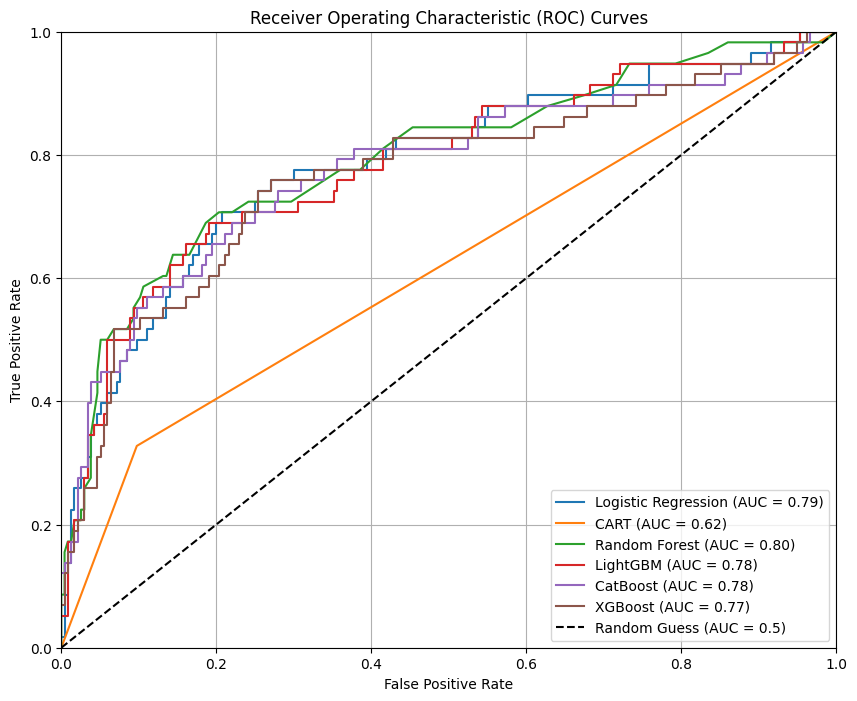

In [144]:
plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic (ROC) Curves')

# Visualize the ROC curves for each model
for name, classifier in models:
    try:
        # If the model supports predict_proba, use this
        if hasattr(classifier, "predict_proba"):
            y_pred_proba = classifier.predict_proba(X_test_scaled)[:, 1]
        # If the model does not provide predict_proba, use decision_function
        elif hasattr(classifier, "decision_function"):
            y_pred_proba = classifier.decision_function(X_test_scaled)
        # If neither predict_proba nor decision_function exists, ROC cannot be calculated
        else:
            print(f"{name} does not support probability or decision function. Skipping...")
            continue

        # ROC curve and AUC calculation
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        # Visualize the ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    except Exception as e:
        print(f"Error with model {name}: {e}")
        continue

# Random Guess for ROC 
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random Guess (AUC = 0.5)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [145]:
# Create Logistic Regression model
LR_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the data with balanced data
LR_model.fit(X_train_balanced_scaled, y_train_balanced)

# Make predictions on the test set
y_pred = LR_model.predict(X_test_scaled)
y_pred_proba = LR_model.predict_proba(X_test_scaled)[:, 1] 

## Model Improvement
Hyperparameter search was performed to optimize the Precision metric in the Logistic Regression model.

In [146]:
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],       
    'solver': ['liblinear']       
}

# Scoring setting
precision_scorer = make_scorer(precision_score)

# RandomizedSearchCV setting
random_search_precision = RandomizedSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_distributions=param_dist,
    scoring=precision_scorer,  
    n_iter=30,  
    cv=10,  
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Train with balanced data
random_search_precision.fit(X_train_balanced_scaled, y_train_balanced)

# Best parameters
print("Best parameters for Precision:", random_search_precision.best_params_)
print("Best Precision Score:", random_search_precision.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters for Precision: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1}
Best Precision Score: 0.7604645807524658


In [147]:
# Get the best model
best_model = random_search_precision.best_estimator_

# Make predictions on test set
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

#Calculate performance metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Performance on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Performance on Test Set:
Accuracy: 0.7279
Precision: 0.3981
Recall: 0.7414
F1 Score: 0.5181
ROC AUC: 0.7864


## Final Integration

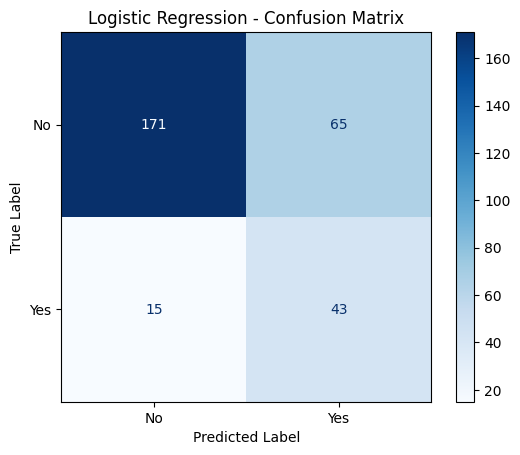

In [148]:
# Confusion matrix 
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])  
disp.plot(cmap=plt.cm.Blues, values_format="d")  
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

****Feature Importance****

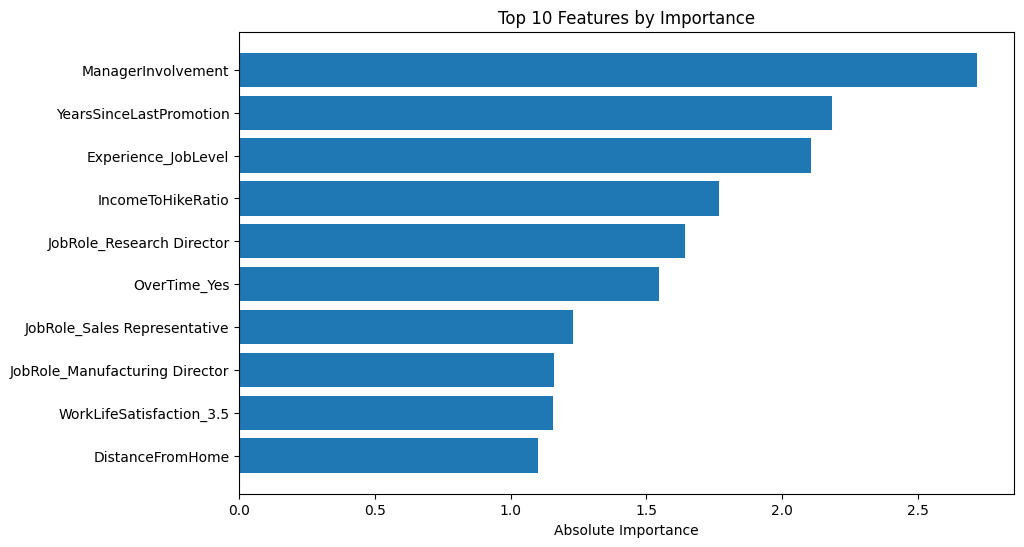

In [149]:
# Get coefficients from Logistic Regression
feature_importance = LR_model.coef_[0]

# Match with selected features
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance
})

# Convert importance values to absolute values and sort
importance_df['Abs_Importance'] = np.abs(importance_df['Importance'])
importance_df = importance_df.sort_values(by='Abs_Importance', ascending=False)

# Top 10 features
top_features = importance_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Abs_Importance'], align='center')
plt.xlabel('Absolute Importance')
plt.title('Top 10 Features by Importance')
plt.gca().invert_yaxis()
plt.show()

In [150]:
# Convert test data set to DataFrame
X_test_df = pd.DataFrame(X_test_scaled, columns=selected_features)

# Add actual and predicted values
results_df = X_test_df.copy()
results_df['True_Attrition'] = y_test.reset_index(drop=True) 
results_df['Predicted_Attrition'] = y_pred  

results_df.head()

,Age,DailyRate,DistanceFromHome,JobLevel,MonthlyIncome,MonthlyRate,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Experience_JobLevel,ManagerInvolvement,IncomePerLevel,IncomeToHikeRatio,RoleChangeGap,BusinessTravel_Travel_Frequently,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Single,OverTime_Yes,IncomeCategory_Low,IncomeCategory_Medium,IncomeCategory_Very High,AgeGroup_Young,WorkLifeSatisfaction_3.5,True_Attrition,Predicted_Attrition
0,0.452381,0.191840,0.321429,0.25,0.168952,0.116362,0.000000,0.250,0.250,0.166667,0.0,0.470588,0.121212,0.40,0.275063,0.130104,0.233333,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0
1,0.000000,0.316392,0.071429,0.00,0.029530,0.655531,0.000000,0.000,0.000,0.000000,0.0,0.000000,0.000000,0.00,0.140351,0.043407,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1,1
2,0.285714,0.025770,0.750000,0.00,0.059217,0.379241,0.000000,0.175,0.125,0.111111,0.0,0.058824,0.030303,0.05,0.281454,0.079831,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,1
3,0.380952,0.881174,0.321429,0.00,0.063858,0.655129,0.333333,0.025,0.025,0.055556,0.0,0.000000,0.006061,0.00,0.303509,0.035375,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,1
4,0.904762,0.906943,0.785714,0.75,0.653501,0.648103,0.333333,0.825,0.475,0.888889,1.0,0.529412,0.460606,0.45,0.586842,0.612904,0.100000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
